# Data Exploration: *Alphabetical Guide to Spain*
List accompanied Thomas Matthews' Spain tasting report in *Wine Spectator* (October 15, 2020)
[Link](https://www.winespectator.com/articles/alphabetical-guide-to-spain-101520) to *Alphabetical Guide to Spain*

## File Setup

In [67]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
import geopandas as gpd
from scipy import stats

In [68]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe exploration
Import dataframes containing wine data and geographic data on Spanish wine regions.

In [69]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

# w = wine, g = geo
# Note: save CSV files in UTF-8 format to preserve special Spanish-language characters

df_w = pd.read_csv('./Alphabetical Guide to Spain - List Upload.csv')
df_g = pd.read_csv('./Alphabetical Guide to Spain - Geo.csv')

In [70]:
df_w.shape

(598, 59)

In [71]:
df_g.shape

(40, 5)

In [72]:
df_w.sample(10)

,Winery,Wine,Score,Price,Wine_Style,Denominación_de_Origen_DO,Geographical_Indication,Year,Rioja_Style,cat_Airén,...,cat_Tempranillo,cat_Tintilla_de_Rota,cat_Tinto_Velasco,cat_Treixadura,cat_Verdejo,cat_Vermell,cat_Vijiriega,cat_Viognier,cat_Viura|Macabeo,cat_Xarel-lo
188,ISAAC FERNANDEZ SELECCIÓN,Mencía Ribeira Sacra Adrás 2016,89,22.0,Red,Ribeira Sacra,Galicia,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,ALVEAR,Fino Montilla-Moriles En Rama 2012,90,22.0,Sherry,Montilla-Moriles,Andalucia,2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,BODEGAS ATECA,Garnacha Calatayud Atteca Old Vines 2017,89,16.0,Red,Calatayud,Aragon,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
551,BODEGAS VALDUERO,Viño de la Tierra de Castilla y León Finca Aza...,88,25.0,Red,Viño de la Tierra,Castilla y León,2017,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,BODEGAS FRANCO-ESPAÑOLAS,Rioja Bordón Crianza 2016,87,15.0,Red,Rioja,Multi-Regional,2016,Crianza,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,BODEGAS CASA ROJO,Verdejo Rueda El Gordo del Circo 2018,89,20.0,White,Rueda,Castilla y León,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,Verdejo,NaN,NaN,NaN,NaN,NaN
363,VIÑEDOS DE NIEVA,Verdejo Rueda 2018,87,20.0,White,Rueda,Castilla y León,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,Verdejo,NaN,NaN,NaN,NaN,NaN
582,VIÑAS DEL VERO,Garnacha Somontano Secastilla 2014,87,40.0,Red,Somontano,Aragon,2014,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,BODEGAS LAN,Rioja Xtrème Crianza 2015,91,20.0,Red,Rioja,Multi-Regional,2015,Crianza,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
428,DOMINIO DE PINGUS,Ribera del Duero Flor de Pingus 2017,89,100.0,Red,Ribera del Duero,Castilla y León,2017,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
df_g.sample(10)

,Location,Denominacion_or_GeoIndicator,Latitude,Longitude,Unnamed: 4
18,Navarra,Denominación_de_Origen_DO,42.481111,1.650556,https://geohack.toolforge.org/geohack.php?page...
7,Cava,Denominación_de_Origen_DO,41.816667,1.466667,https://geohack.toolforge.org/geohack.php?page...
15,Méntrida,Denominación_de_Origen_DO,40.050000,-4.200000,https://geohack.toolforge.org/geohack.php?page...
19,Penedès,Denominación_de_Origen_DO,41.293283,1.749572,https://geohack.toolforge.org/geohack.php?page...
3,Bizkaiko Txakolina,Denominación_de_Origen_DO,43.325556,-2.988889,https://geohack.toolforge.org/geohack.php?page...
24,Ribera del Duero,Denominación_de_Origen_DO,41.683333,-3.683333,https://geohack.toolforge.org/geohack.php?page...
35,Cadiz,Geographical_Indication,36.500000,-5.750000,https://geohack.toolforge.org/geohack.php?page...
36,Castilla,Geographical_Indication,39.866667,-4.016667,https://geohack.toolforge.org/geohack.php?page...
25,Rioja,Denominación_de_Origen_DO,42.461750,-2.445694,https://geohack.toolforge.org/geohack.php?page...
30,Utiel-Requena,Denominación_de_Origen_DO,39.506158,-1.181028,https://geohack.toolforge.org/geohack.php?page...


In [74]:
df_w_notnull = df_w[
    (df_w.Score > 0) & 
    (df_w.Price > 0) 
]

df_w_notnull.shape

(593, 59)

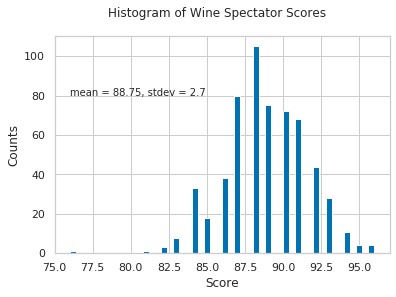

In [75]:
# Plot histograms of Scores

s_mean = df_w_notnull.Score.mean()
s_stdev = df_w_notnull.Score.std()
ms = 'mean = ' + str(round(s_mean, 2)) + ', stdev = ' + str(round(s_stdev, 2))

n, bins, patches = plt.hist(df_w_notnull.Score, 50)
plt.xlabel('Score')
plt.ylabel('Counts')
plt.suptitle('Histogram of Wine Spectator Scores')
plt.text(76, 80, ms)
plt.show()

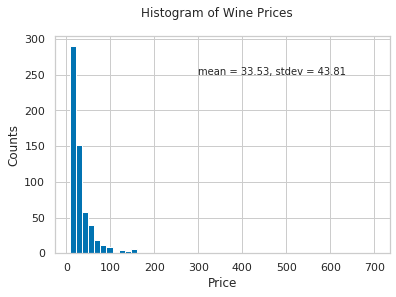

In [76]:
# Plot histograms of Prices

s_mean = df_w_notnull.Price.mean()
s_stdev = df_w_notnull.Price.std()
ms = 'mean = ' + str(round(s_mean, 2)) + ', stdev = ' + str(round(s_stdev, 2))

n, bins, patches = plt.hist(df_w_notnull.Price, 50)
plt.xlabel('Price')
plt.ylabel('Counts')
plt.suptitle('Histogram of Wine Prices')
plt.text(300, 250, ms)
plt.show()

Text(0.5, 0.98, 'Box Plot of Wine Spectator Scores')

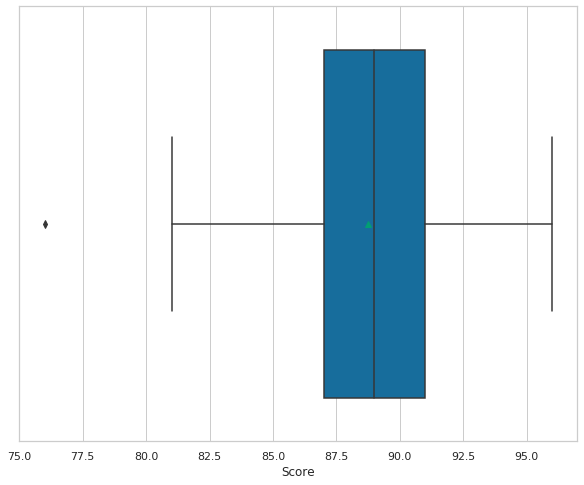

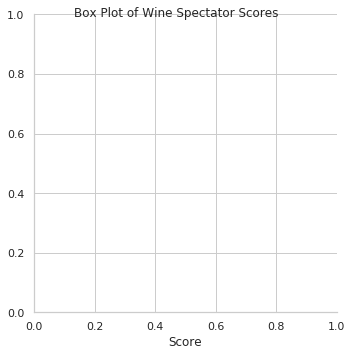

In [77]:
# Plot boxplot of Scores
dim = (10, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(x = 'Score', data = df_w_notnull, kind = 'box', showmeans = True, ax=ax)
plt.suptitle('Box Plot of Wine Spectator Scores')

Text(0.5, 0.98, 'Box Plot of Wine Prices')

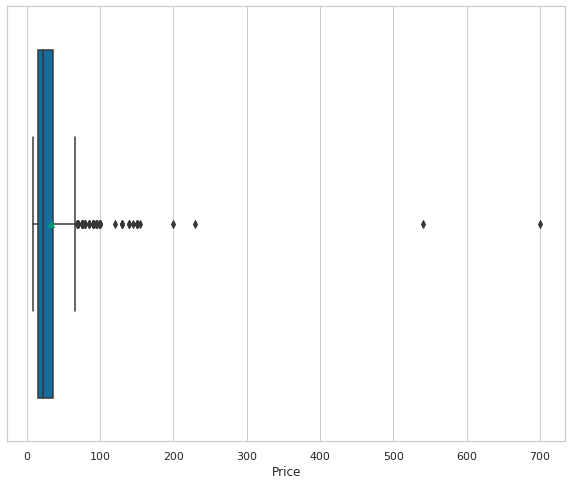

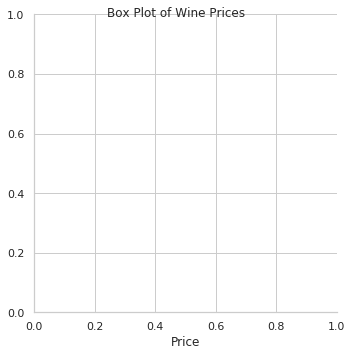

In [78]:
# Plot boxplot of Prices
dim = (10, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(x = 'Price', data = df_w_notnull, kind = 'box', showmeans = True, ax=ax)
plt.suptitle('Box Plot of Wine Prices')

Text(0.5, 0.98, 'Scatterplot of Wine Spectator Score vs. Wine Price')

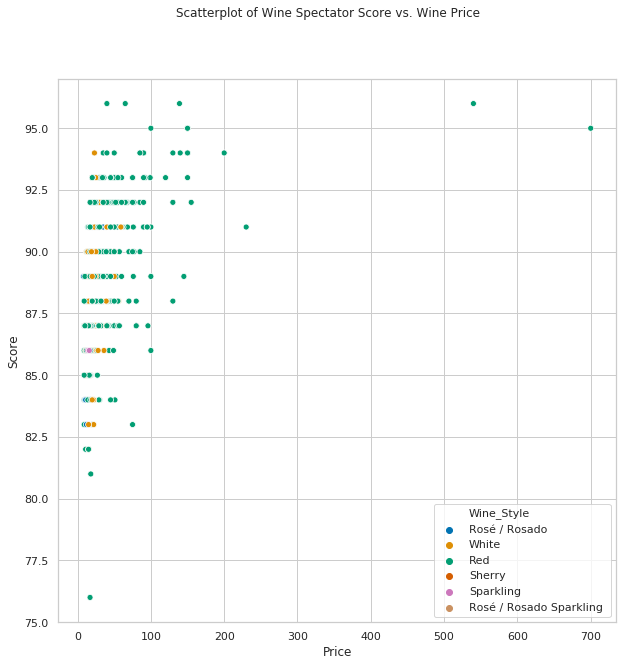

In [79]:
# Plot scatterplot of Score vs. Price

dim = (10, 10)
fig, ax = plt.subplots(figsize = dim)

sns.scatterplot(data = df_w_notnull, x = 'Price', y = 'Score', palette = 'colorblind', hue = 'Wine_Style', ax = ax)
plt.suptitle('Scatterplot of Wine Spectator Score vs. Wine Price')

## Eliminate Outliers
Repeat the analysis above, but exclude two wines with extreme prices:
* Ribera del Duero Unico 2010, Score = 96, Price = 540
* Ribera del Duero Unico Reserva Especial NV, Score = 95, Price = 700

In [80]:
df_w_trim = df_w[
    (df_w.Score > 0) & 
    (df_w.Price > 0) &
    (df_w.Price < 540)
]

df_w_trim.shape

(591, 59)

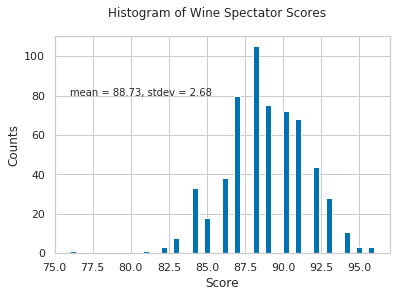

In [81]:
# Plot histograms of Scores

s_mean = df_w_trim.Score.mean()
s_stdev = df_w_trim.Score.std()
ms = 'mean = ' + str(round(s_mean, 2)) + ', stdev = ' + str(round(s_stdev, 2))

n, bins, patches = plt.hist(df_w_trim.Score, 50)
plt.xlabel('Score')
plt.ylabel('Counts')
plt.suptitle('Histogram of Wine Spectator Scores')
plt.text(76, 80, ms)
plt.show()

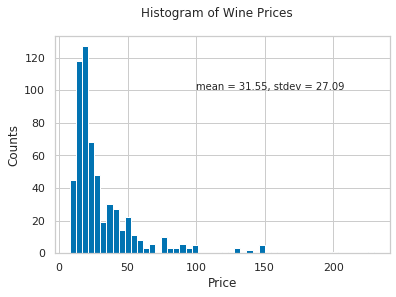

In [82]:
# Plot histograms of Prices

s_mean = df_w_trim.Price.mean()
s_stdev = df_w_trim.Price.std()
ms = 'mean = ' + str(round(s_mean, 2)) + ', stdev = ' + str(round(s_stdev, 2))

n, bins, patches = plt.hist(df_w_trim.Price, 50)
plt.xlabel('Price')
plt.ylabel('Counts')
plt.suptitle('Histogram of Wine Prices')
plt.text(100, 100, ms)
plt.show()

Text(0.5, 0.98, 'Box Plot of Wine Spectator Scores')

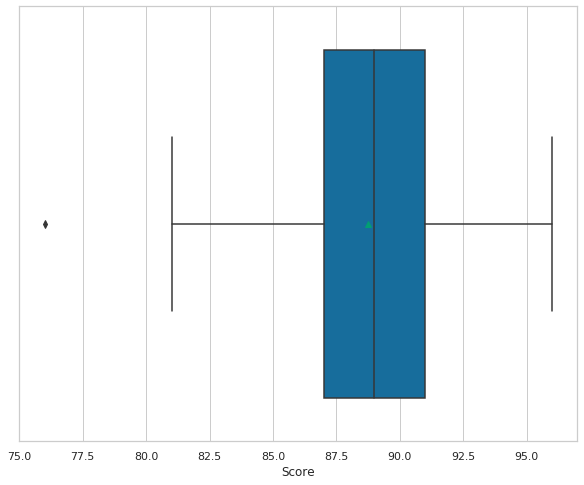

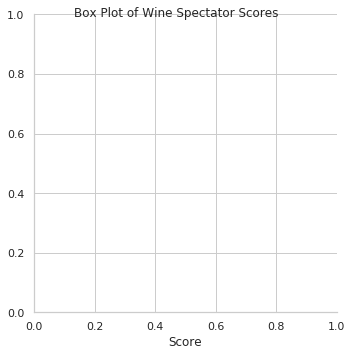

In [83]:
# Plot boxplot of Scores
dim = (10, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(x = 'Score', data = df_w_trim, kind = 'box', showmeans = True, ax=ax)
plt.suptitle('Box Plot of Wine Spectator Scores')

Text(0.5, 0.98, 'Box Plot of Wine Prices')

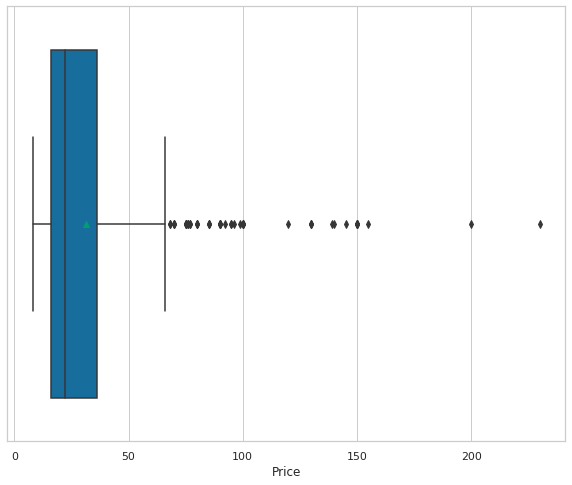

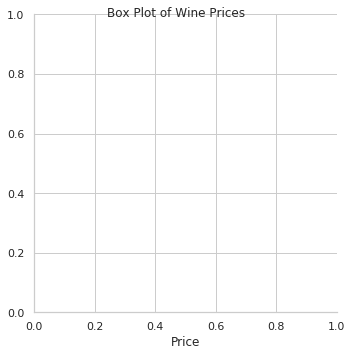

In [84]:
# Plot boxplot of Prices
dim = (10, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(x = 'Price', data = df_w_trim, kind = 'box', showmeans = True, ax=ax)
plt.suptitle('Box Plot of Wine Prices')

Text(0.5, 0.98, 'Scatterplot of Wine Spectator Score vs. Wine Price')

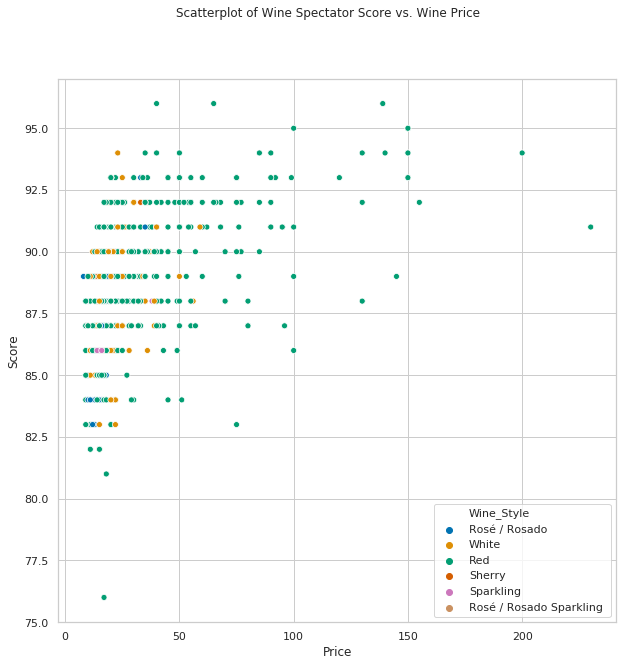

In [85]:
# Plot scatterplot of Score vs. Price

dim = (10, 10)
fig, ax = plt.subplots(figsize = dim)

sns.scatterplot(data = df_w_trim, x = 'Price', y = 'Score', palette = 'colorblind', hue = 'Wine_Style', ax = ax)
plt.suptitle('Scatterplot of Wine Spectator Score vs. Wine Price')

## Statistics by Wine Style

Text(0.5, 0.98, 'Count of Wines by Wine Style')

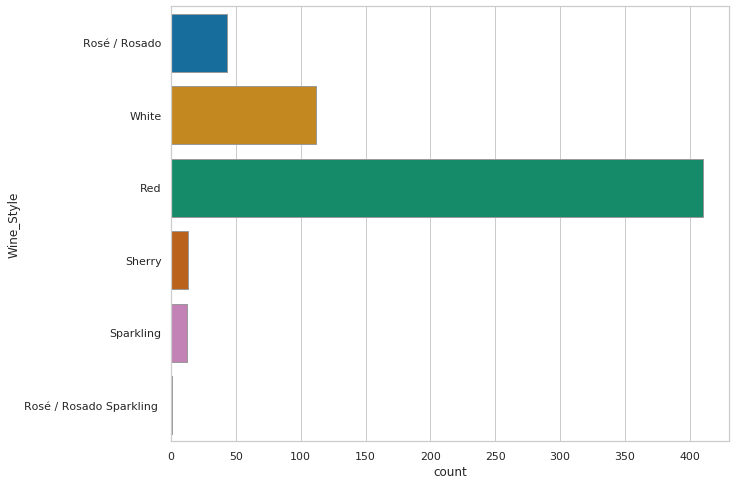

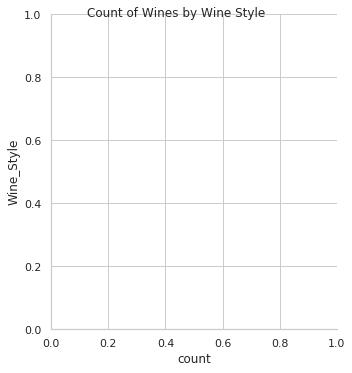

In [86]:
# Countplot: What is the distribution of scores by wine style?

dim = (10, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(y = 'Wine_Style', kind = 'count', palette='colorblind', edgecolor='.6', data = df_w_trim, ax = ax)
plt.suptitle('Count of Wines by Wine Style')

Text(0.5, 0.98, 'Box Plot of Wine Spectator Score by Wine Style')

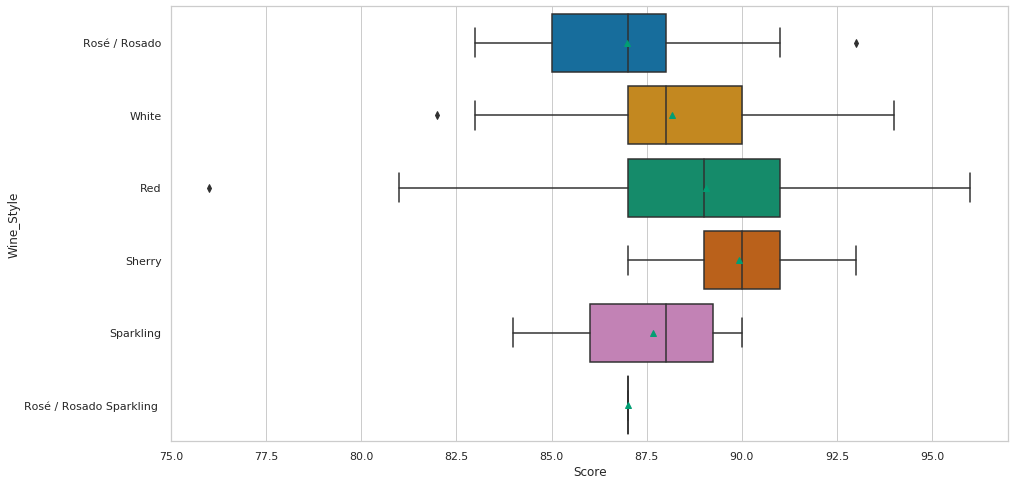

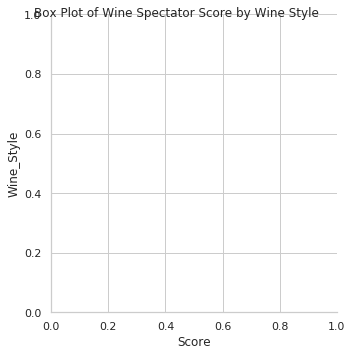

In [87]:
# Box Plot of Scores by Wine Style

dim = (15, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(y = 'Wine_Style', x = 'Score', data = df_w_trim, kind = 'box', ax = ax, showmeans = True)
plt.suptitle('Box Plot of Wine Spectator Score by Wine Style')

Text(0.5, 0.98, 'Box Plot of Wine Price by Wine Style')

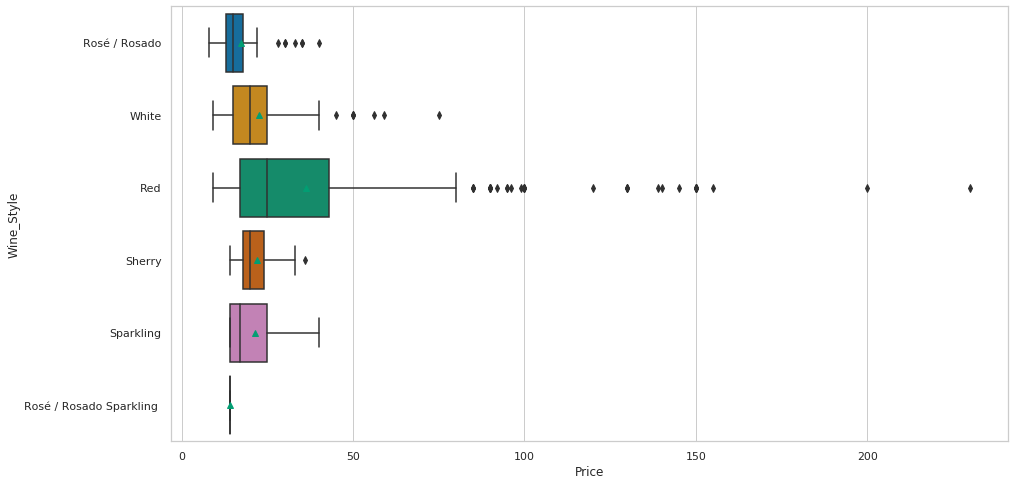

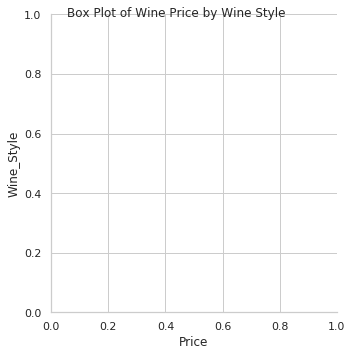

In [88]:
# Box Plot of Prices by Wine Style

dim = (15, 8)
fig, ax = plt.subplots(figsize = dim)

sns.catplot(y = 'Wine_Style', x = 'Price', data = df_w_trim, kind = 'box', ax = ax, showmeans = True)
plt.suptitle('Box Plot of Wine Price by Wine Style')

### Hypothesis Test: Wine Score by Wine Style
Determine whether or not the difference in means between wine styles is statistically significant for Wine Spectator Score.  
#### Test Setup: Two-Sided T-Test on *Wine Spectator* Scores
Scores follow an apparent normal distribution; use Student's t distribution.  
  
  
H<sub>0</sub>: &mu;<sub>1</sub> - &mu;<sub>2</sub> = 0  
H<sub>1</sub>: &mu;<sub>1</sub> - &mu;<sub>2</sub> &#8800; 0  
  
significance level: 0.10

*Reject the null hypothesis when p-value < significance level*

In [89]:
# input significance level
sig = 0.1

In [90]:
# Create a loopable array of Wine Styles
styles = df_w_trim.Wine_Style.unique()

# Set up data frames to house two-sided t-test
ttest_cols = ['style_1', 'style_2', 's1', 's2', 'n1', 'n2', 'x1', 'x2', 'ttest_tstat', 'ttest_pvalue', 'reject_null']
df_t_s = pd.DataFrame(columns = ttest_cols)

# For each pair of wine styles, populate the dataframe with statistics
for style in styles:
    style_1 = style
    for style in styles:
        style_2 = style
        # standard deviation of each wine style
        s1 = df_w_trim[(df_w_trim.Wine_Style == style_1)].Score.std()
        s2 = df_w_trim[(df_w_trim.Wine_Style == style_2)].Score.std()
        # number of scores of each wine style
        n1 = df_w_trim[(df_w_trim.Wine_Style == style_1)].Score.count()
        n2 = df_w_trim[(df_w_trim.Wine_Style == style_2)].Score.count()
        # sample mean by wine style
        x1 = df_w_trim[(df_w_trim.Wine_Style == style_1)].Score.mean()
        x2 = df_w_trim[(df_w_trim.Wine_Style == style_2)].Score.mean()
        
        # Run SciPy stats t-test
        arr1 = df_w_trim[(df_w_trim.Wine_Style == style_1)].Score
        arr2 = df_w_trim[(df_w_trim.Wine_Style == style_2)].Score
        
        ttest = stats.ttest_ind(arr1, arr2)
        
        # reject the null hypothesis when the P-value is less than the significance level
        if ( ttest[1] < sig ):
            reject_null = True
        else:
            reject_null = False
        
        # put variables in array
        arr_temp = [style_1, style_2, s1, s2, n1, n2, x1, x2, ttest[0], ttest[1], reject_null]
        
        # convert array into series
        series_temp = pd.Series(arr_temp, index = df_t_s.columns)
        
        # append series to dataframe
        df_t_s = df_t_s.append(series_temp, ignore_index=True)

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [91]:
df_t_s

,style_1,style_2,s1,s2,n1,n2,x1,x2,ttest_tstat,ttest_pvalue,reject_null
0,Rosé / Rosado,Rosé / Rosado,2.293764,2.293764,43,43,86.976744,86.976744,0.000000,1.000000,False
1,Rosé / Rosado,White,2.293764,2.461283,43,112,86.976744,88.178571,-2.772304,0.006258,True
2,Rosé / Rosado,Red,2.293764,2.708077,43,410,86.976744,89.060976,-4.865784,0.000002,True
3,Rosé / Rosado,Sherry,2.293764,1.754116,43,13,86.976744,89.923077,-4.259563,0.000082,True
4,Rosé / Rosado,Sparkling,2.293764,2.059715,43,12,86.976744,87.666667,-0.940380,0.351289,False
5,Rosé / Rosado,Rosé / Rosado Sparkling,2.293764,NaN,43,1,86.976744,87.000000,NaN,NaN,False
6,White,Rosé / Rosado,2.461283,2.293764,112,43,88.178571,86.976744,2.772304,0.006258,True
7,White,White,2.461283,2.461283,112,112,88.178571,88.178571,0.000000,1.000000,False
8,White,Red,2.461283,2.708077,112,410,88.178571,89.060976,-3.114507,0.001944,True
9,White,Sherry,2.461283,1.754116,112,13,88.178571,89.923077,-2.479247,0.014520,True


In [92]:
# Pivot table: p-values by wine style

df_t_s.pivot(index = 'style_1', columns = 'style_2', values = 'ttest_pvalue')

style_2,Red,Rosé / Rosado,Rosé / Rosado Sparkling,Sherry,Sparkling,White
style_1,,,,,,
Red,1.000000,0.000002,NaN,0.255144,0.077819,0.001944
Rosé / Rosado,0.000002,1.000000,NaN,0.000082,0.351289,0.006258
Rosé / Rosado Sparkling,NaN,NaN,NaN,NaN,NaN,NaN
Sherry,0.255144,0.000082,NaN,1.000000,0.007074,0.014520
Sparkling,0.077819,0.351289,NaN,0.007074,1.000000,0.488897
White,0.001944,0.006258,NaN,0.014520,0.488897,1.000000


In [93]:
# Pivot table: reject_null by wine style

df_t_s.pivot(index = 'style_1', columns = 'style_2', values = 'reject_null')

style_2,Red,Rosé / Rosado,Rosé / Rosado Sparkling,Sherry,Sparkling,White
style_1,,,,,,
Red,False,True,False,False,True,True
Rosé / Rosado,True,False,False,True,False,True
Rosé / Rosado Sparkling,False,False,False,False,False,False
Sherry,False,True,False,False,True,True
Sparkling,True,False,False,True,False,False
White,True,True,False,True,False,False
